In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
df_original = pd.read_csv("Dhaka Rent.csv", sep=";")
df = pd.read_csv("Dhaka Rent.csv", sep=";")

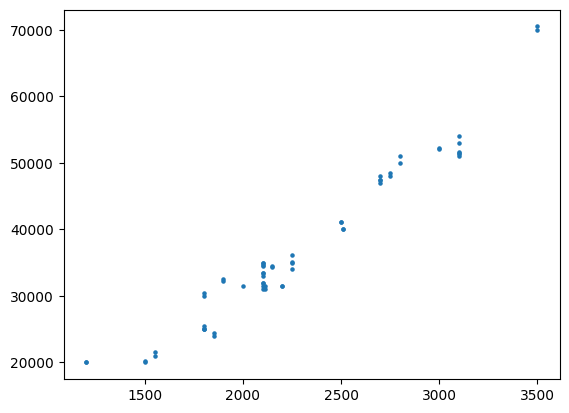

In [ ]:
plt.scatter(df_original['area'], df_original['rent'], s=5)
plt.show()

In [ ]:
#min-max normalization
df.area=(df_original.area - df_original.area.min())/(df_original.area.max()-df_original.area.min())
df.rent=(df_original.rent - df_original.rent.min())/(df_original.rent.max()-df_original.rent.min())
df.head()

,area,rent
0,0.347826,0.227723
1,0.391304,0.297030
2,0.565217,0.416832
3,0.456522,0.318812
4,0.782609,0.635644


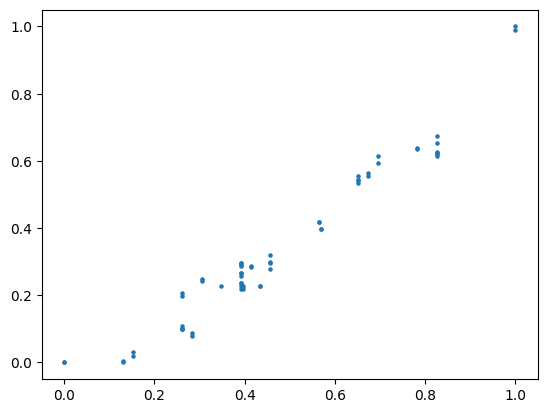

In [ ]:
plt.scatter(df['area'], df['rent'], s=5)
plt.show()

In [ ]:
train = df.iloc[:40] #remaining 20
test = df.iloc[40: 60]
print(train.shape, test.shape)

(40, 2) (20, 2)


In [ ]:
reg = LinearRegression()
reg = reg.fit(train[['area']], train.rent)

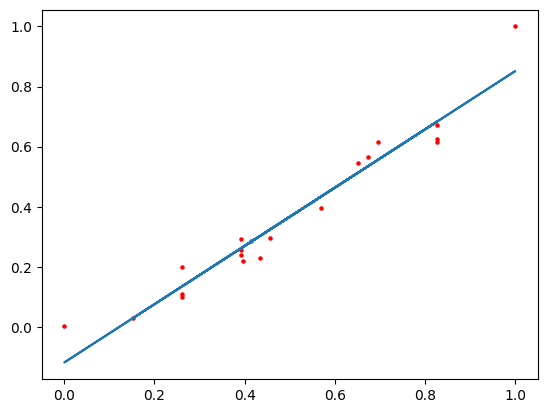

In [ ]:
plt.plot(test.area, reg.predict(test[['area']]))
plt.scatter(test.area, test.rent, s=5, c='red')
plt.show()

In [ ]:
offset = (df_original.rent.max() - df_original.rent.min()) + df_original.rent.min()
pred = reg.predict([[test.area.iloc[0]]])[0]
print("Original value ", test.rent.iloc[0] * offset)
print("Predicted value ", pred * offset)
print("Error ", round(abs(test.rent.iloc[0] - pred) * 100 / test.rent.iloc[0], 2), "%")

Original value  20102.9702970297
Predicted value  19885.77588376521
Error  1.08 %


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
